In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.constants import golden
import statsmodels.api as sm
from scipy.stats import norm

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))

heroes = pd.read_csv('../heroes.csv', sep = ';', index_col=0)
heroes

,Identity,Birth place,Publisher,Height,Weight,Gender,First appearance,Eye color,Hair color,Strength,Intelligence
Name,,,,,,,,,,,
A-Bomb,Richard Milhouse Jones,"Scarsdale, Arizona",Marvel Comics,203.21,441.95,M,2008.0,Yellow,No Hair,100.0,moderate
Abraxas,Abraxas,Within Eternity,Marvel Comics,NaN,NaN,M,NaN,Blue,Black,100.0,high
Abomination,Emil Blonsky,"Zagreb, Yugoslavia",Marvel Comics,203.04,441.98,M,NaN,Green,No Hair,80.0,good
Adam Monroe,NaN,NaN,NBC - Heroes,NaN,NaN,M,NaN,Blue,Blond,10.0,good
Agent 13,Sharon Carter,NaN,Marvel Comics,173.41,61.03,F,NaN,Blue,Blond,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Alan Scott,Alan Ladd Wellington Scott,Gotham City,DC Comics,180.98,90.81,M,1940.0,Blue,Blond,80.0,good
Amazo,NaN,NaN,DC Comics,257.49,173.95,M,1960.0,Red,NaN,100.0,good
Ant-Man,Hank Pym,"Elmsford, New York",Marvel Comics,211.74,122.44,M,1962.0,Blue,Blond,20.0,high


In [7]:
#VEDIAMO I PRINCIPALI INDICI DI DISPERSIONE (relativi all'anno di apparizione)
year = heroes['First appearance']

In [41]:
#VARIANZA
year.var()

388.7687050520392

In [42]:
#DEVIAZIONE STANDARD
year.std()

19.717218491766

In [8]:
#DESCRIBE: restituisce i principali indici di centralità e dispersione
year.describe()

count     367.000000
mean     1979.855586
std        19.717218
min      1933.000000
25%      1965.000000
50%      1979.000000
75%      1994.000000
max      2099.000000
Name: First appearance, dtype: float64

In [9]:
#QUANTILI: passare come argomento il livello del quantile voluto
year.quantile(.15)

1963.0

In [10]:
#BOX PLOT

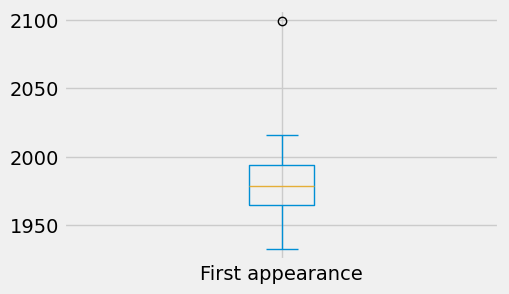

Il puntino in alto è un outlier.
Specificando l argomento whis = range il baffo superiore si estende
fino al valore massimo misurato.


In [15]:
year.plot.box()
plt.show()
print('Il puntino in alto è un outlier.\nSpecificando l argomento whis = range il baffo superiore si estende\nfino al valore massimo misurato.')

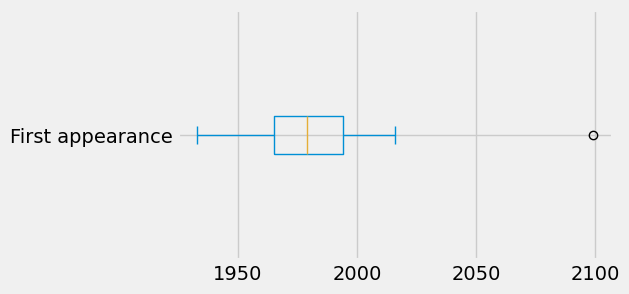

In [17]:
#visualizzazione in verticale
year.plot.box(vert = False)
plt.show()

In [18]:
#DIAGRAMMI Q-Q
print('Vengono usati quando, considerando due sottogruppi distinti di un campione, voglio trarre delle conclusioni\nsu un attributo ad essi comune.')

Vengono usati quando, considerando due sottogruppi distinti di un campione, voglio trarre delle conclusioni
su un attributo ad essi comune.


In [43]:
#Consideriamo le altezze dei supereroi Marvel e DC
marvel = heroes.loc[(heroes['Publisher'] == 'Marvel Comics') & (heroes['Height'].between(150,200))]
dc = heroes.loc[(heroes['Publisher'] == 'DC Comics') & (heroes['Height'].between(150,200))]

marvel_sample = marvel['Height'].sample(120)
dc_sample = dc['Height'].sample(120)
(marvel_sample.quantile(.2), dc_sample.quantile(.2))
#I due quantili ottenuti, essendo molto diversi, dimostrano che le due altezze seguono la stessa distribuzione

173.6 170.456


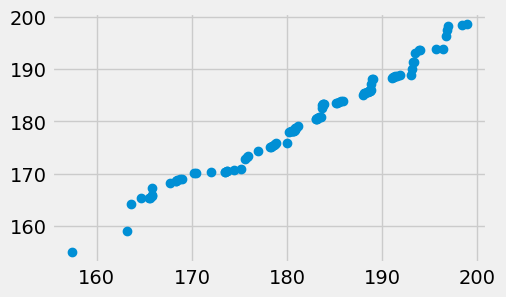

i valori si avvicinano molto ad una retta che passa per il primoe e terzo quadrante


In [46]:
#Diagramma Q-Q
levels = np.linspace(0,1,100)
plt.plot(marvel_sample.quantile(levels),dc_sample.quantile(levels), 'o')
plt.show()
print('i valori si avvicinano molto ad una retta che passa per il primoe e terzo quadrante')

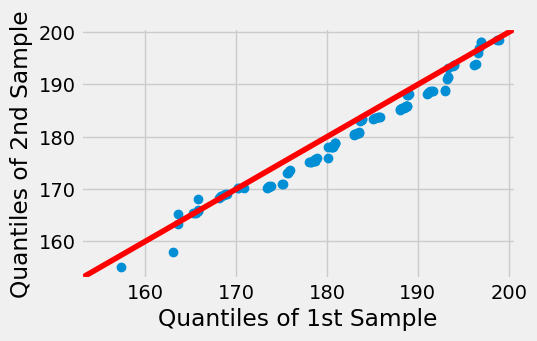

In [47]:
#Costruzione di un diagramma Q-Q mediante qqplot_2samples 
sm.qqplot_2samples(marvel_sample, dc_sample, line = '45')
plt.show()

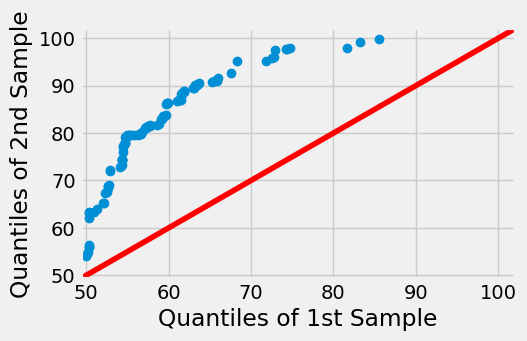

In [54]:
#Consideriamo ora un Q-Q plot che dimostri il contrario, così da vedere i due casi
female = heroes.loc[(heroes['Gender'] == 'F') & (heroes['Weight'].between(50,100))]
male = heroes.loc[(heroes['Gender'] == 'M') & (heroes['Weight'].between(50,100))]

female_sample = female['Weight'].sample(100)
male_sample = male['Weight'].sample(100)

sm.qqplot_2samples(female_sample, male_sample, line = '45')
plt.show()

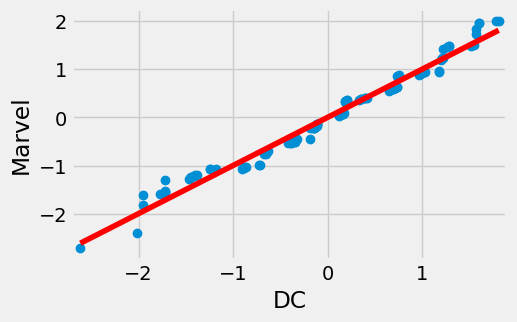

In [56]:
#Standardizziamo il primo grafico per confinare il grafico vicino all'origine ed evidenziare meglio gli outlier
sm.qqplot_2samples((marvel_sample-marvel_sample.mean())/marvel_sample.std(),
                  (dc_sample-dc_sample.mean()) / dc_sample.std(),
                  line='s',
                  xlabel = 'DC', ylabel = 'Marvel')
plt.show()

In [57]:
#SIMMETRIA, DISTRIBUZIUONI APP. NORMALI E REGOLA EMPIRICA

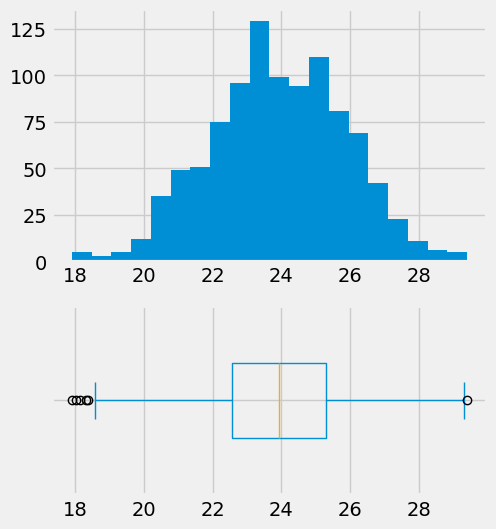

In [62]:
#Possiamo vedere la simmetria mediante istogramma + box plot
sample = pd.Series(norm.rvs(24,2, size=1000), name = '')
f, (h,b) = plt.subplots(2,1,gridspec_kw={'height_ratios':[4,3]})
f.set_figheight(6)
h.yaxis.label.set_visible(False)
sample.plot.hist(bins = 20, ax=h)
sample.plot.box(vert = False, ax=b, widths=.4, label = None)
plt.show()

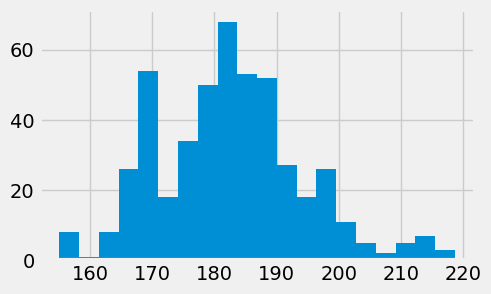

Come si vede, l andamento del grafico è tendenzialmente a campana, il che mostra una distribuzione
approssimativamente normale


In [3]:
#Vediamo invece una distribuzione "appossimativamente normale"
sample = heroes[(heroes['Height'].between(150,220))]['Height']
sample.plot.hist(bins = 20)
plt.ylabel('')
plt.show()
print('Come si vede, l andamento del grafico è tendenzialmente a campana, il che mostra una distribuzione\napprossimativamente normale')